# Prediction model with help of half time goals for both teams

LR: 0.656088 (0.042875)
LDA: 0.656088 (0.042875)
KNN: 0.603247 (0.045219)
CART: 0.643487 (0.057583)
NB: 0.646997 (0.042880)
SVM: 0.637237 (0.055832)
XGB: 0.637237 (0.057555)


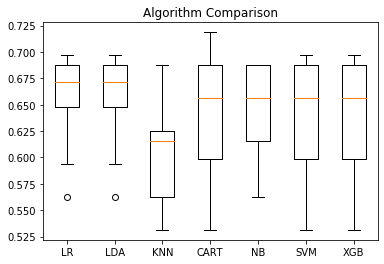

In [7]:
# compare algorithms
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load dataset
dataset = read_csv("football_xx.csv", header = 0)
dataset.dropna(axis=1)
dataset.dropna(axis=0)

# Split-out validation dataset
array = dataset.values
X = array[:,1:3]
Y = array[:,0]
#Y = dataset.FTR
#X = dataset.drop('FTR', axis=1) 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', xgb.XGBClassifier(seed = 82)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [2]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load dataset
dataset = read_csv("football_xx.csv", header = 0)

# Split-out validation dataset
array = dataset.values
X = array[:,1:3]
Y = array[:,0]
#Y = dataset.FTR
#X = dataset.drop('FTR', axis=1) 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

# Make predictions on validation dataset
#model = LogisticRegression(solver='liblinear', multi_class='ovr')
#model = LinearDiscriminantAnalysis()
model = KNeighborsClassifier()
#model = DecisionTreeClassifier()
#model = GaussianNB()
#model = SVC(gamma='auto')
#model = xgb.XGBClassifier(seed = 82)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.675
[[19  0  7]
 [ 5  0  9]
 [ 3  2 35]]
              precision    recall  f1-score   support

           A       0.70      0.73      0.72        26
           D       0.00      0.00      0.00        14
           H       0.69      0.88      0.77        40

    accuracy                           0.68        80
   macro avg       0.46      0.54      0.50        80
weighted avg       0.57      0.68      0.62        80



# Prediction model with help of odds

LR: 0.578886 (0.050932)
LDA: 0.582004 (0.041056)
KNN: 0.566514 (0.044510)
CART: 0.512051 (0.085410)
NB: 0.473926 (0.059374)
SVM: 0.559201 (0.050858)
XGB: 0.517878 (0.071130)


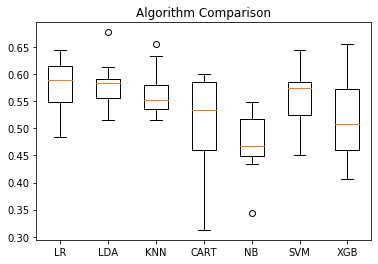

In [9]:
# compare algorithms
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb

# Load dataset
dataset = read_csv("football_18-19_odds_.csv", header = 0)

# Split-out validation dataset
array = dataset.values
X = array[:,1:4]
Y = array[:,0]
#Y = dataset.FTR
#X = dataset.drop('FTR', axis=1) 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', xgb.XGBClassifier(seed = 82)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=123, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [8]:
# make predictions
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Load dataset
dataset = read_csv("football_18-19_odds_.csv", header = 0)

# Split-out validation dataset
array = dataset.values
X = array[:,1:4]
Y = array[:,0]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

# Make predictions on validation dataset
#model = LogisticRegression(solver='liblinear', multi_class='ovr')
#model = LinearDiscriminantAnalysis()
#model = KNeighborsClassifier()
#model = DecisionTreeClassifier()
#model = GaussianNB()
#model = xgb.XGBClassifier(seed = 82)
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.618421052631579
[[ 9  0 12]
 [ 1  0 14]
 [ 2  0 38]]
              precision    recall  f1-score   support

           A       0.75      0.43      0.55        21
           D       0.00      0.00      0.00        15
           H       0.59      0.95      0.73        40

    accuracy                           0.62        76
   macro avg       0.45      0.46      0.43        76
weighted avg       0.52      0.62      0.54        76



C:\Users\christian\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
